shape of harmonics_freq: (141,)
shape of harmonics_amp: (141,)


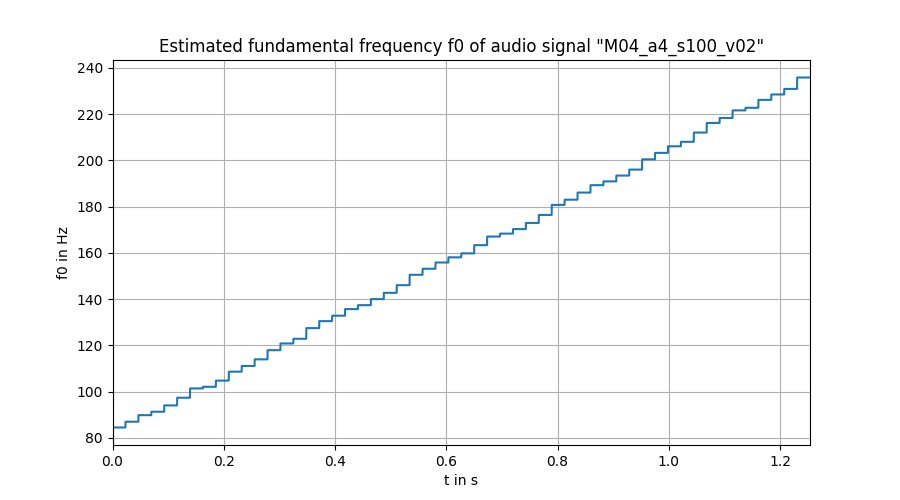

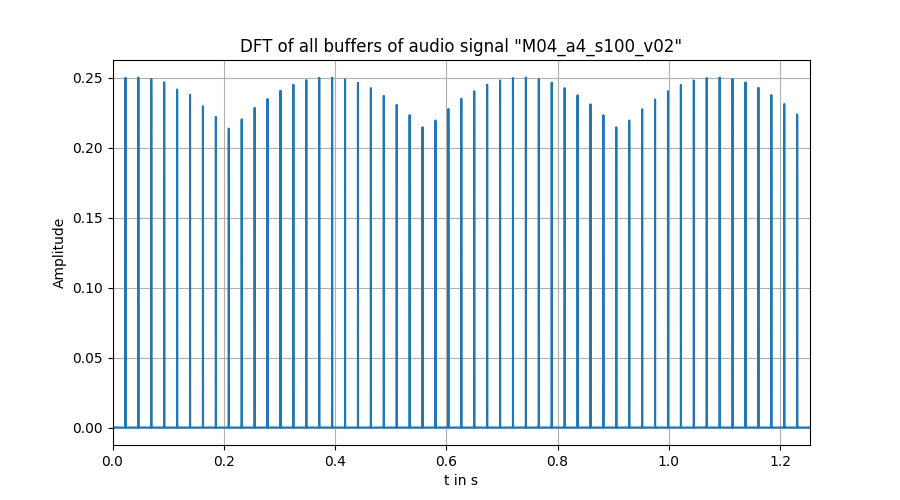

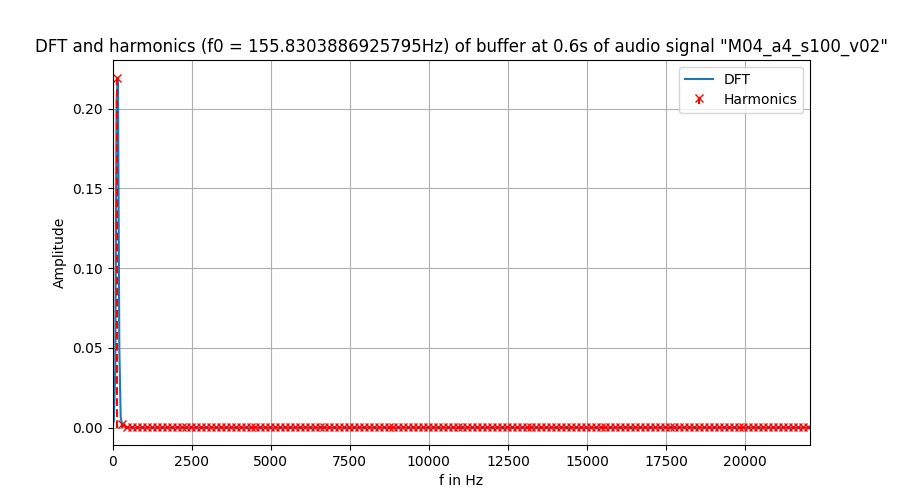

In [ ]:
%matplotlib widget
import numpy as np
from matplotlib import pyplot as plt
from scipy.io.wavfile import write
from matplotlib.ticker import FuncFormatter

# File names (and paths)
writtenFile_1 = "writtenFile_1.bin"
writtenFile_2 = "writtenFile_2.bin"
writtenFile_3 = "writtenFile_3.bin"
writtenFile_4 = "writtenFile_4.bin"
writtenFile_5 = "writtenFile_5.bin"
writtenFile_6 = "writtenFile_6.bin"

# Read binary file (double format, change if necessary)
x_1 = np.fromfile(writtenFile_1, dtype=np.double)
x_2 = np.fromfile(writtenFile_2, dtype=np.double)
x_3 = np.fromfile(writtenFile_3, dtype=np.double)
x_4 = np.fromfile(writtenFile_4, dtype=np.double)
x_5 = np.fromfile(writtenFile_5, dtype=np.double)
x_6 = np.fromfile(writtenFile_6, dtype=np.double)

# Write as wav file (useless if signal is not audio)
fs = 44100 # sampling rate in Hz, change if necessary
# Problem: wav files usually store int16 data, but our recorded data is float64 aka double
# Check the range of the signal via the plot and if it is in the range -1 to 1,
# we can convert it to int16 by multiplying with 32767
x_1_int16 = (x_1 * 32767).astype(np.int16)
x_6_int16 = (x_6 * 32767).astype(np.int16)
write("writtenFile_1.wav", fs, x_1_int16)
write("writtenFile_6.wav", fs, x_6_int16)


# Plot the results
# Close all previous figures to avoid accumulation
plt.close('all')

# Change the title to the used audio file name
# audio_file = "Tone_220Hz"
# audio_file = "Sweep_80-450Hz"
# audio_file = "F01_a3_s100_v04"
# audio_file = "F03_a1_s100_v03"
audio_file = "M04_a4_s100_v02"
# audio_file = "M07_a1_s100_v03"

# Parameters to change if necessary
N = 1024  # Adapt the buffer size / DFT size
n_fft = N  # FFT size
target_time = 0.6  # in seconds, in the middle of the chosen target buffer

# Extract DFT magnitude for the buffer at target time
buffer_duration = N / fs  # in seconds
buffer_idx = int(target_time / buffer_duration)  # index of target buffer
start_idx = buffer_idx * N  # start index of the target buffer
end_idx = start_idx + N # end index of the target buffer
DFT_magnitude = x_4[start_idx:end_idx] # DFT magnitude of the target buffer

# Extract harmonic frequencies and amplitudes for the buffer at target time
f0 = x_3[start_idx + N//2]  # fundamental frequency at target buffer
harmonics_freq = [] # frequencies of harmonics
harmonics_amp = [] # amplitudes of harmonics
n = 0
while x_5[start_idx + n] > 0 and (start_idx + n) <= end_idx:
    harmonics_freq.append((n+1) * f0)
    harmonics_amp.append(x_5[start_idx + n])
    n += 1

print(f'shape of harmonics_freq: {np.array(harmonics_freq).shape}')
print(f'shape of harmonics_amp: {np.array(harmonics_amp).shape}')


# t_1 = np.arange(len(x_1)) / fs
# plt.figure(figsize=(9, 5))
# plt.plot(t_1, x_1)
# plt.xlim(0, t_1[-1])
# plt.xlabel('t in s')
# plt.ylabel('Amplitude')
# plt.title('Audio signal' + ' "' + audio_file + '"')
# plt.grid()
# plt.show()

# t_2 = np.arange(len(x_2)) / fs
# plt.figure(figsize=(9, 5))
# plt.plot(t_2, x_2)
# plt.xlim(0, t_2[-1])
# plt.xlabel('t in s')
# plt.ylabel('Amplitude')
# plt.title('Normalized autocorrelation function of audio signal' + ' "' + audio_file + '"')
# plt.grid()
# plt.show()

t_3 = np.arange(len(x_3)) / fs
plt.figure(figsize=(9, 5))
plt.plot(t_3, x_3)
plt.xlim(0, t_3[-1])
plt.xlabel('t in s')
plt.ylabel('f0 in Hz')
plt.title('Estimated fundamental frequency f0 of audio signal' + ' "' + audio_file + '"')
plt.grid()
plt.show()

t_4 = np.arange(len(x_4)) / fs
plt.figure(figsize=(9, 5))
plt.plot(t_4, x_4)
plt.xlim(0, t_4[-1])
plt.xlabel('t in s')
plt.ylabel('Amplitude')
plt.title('DFT of all buffers of audio signal' + ' "' + audio_file + '"')
plt.grid()
plt.show()

f = np.linspace(0, fs, N)
plt.figure(figsize=(9, 5))
plt.plot(f, DFT_magnitude, label='DFT')
markerline, stemlines, baseline = plt.stem(harmonics_freq, harmonics_amp, linefmt='r--', markerfmt='rx', label='Harmonics')
plt.setp(markerline, 'linewidth', 1.5)
plt.setp(baseline, visible=False)
plt.xlim(0, fs/2)
plt.xlabel('f in Hz')
plt.ylabel('Amplitude')
plt.legend()
plt.title(f'DFT and harmonics (f0 = {f0:.2f}Hz) of buffer at {target_time}s of audio signal' + ' "' + audio_file + '"')
plt.grid()
plt.show()

# t_6 = np.arange(len(x_6)) / fs
# plt.figure(figsize=(9, 5))
# plt.plot(t_6, x_6)
# plt.xlim(0, t_6[-1])
# plt.xlabel('t in s')
# plt.ylabel('Amplitude')
# plt.title('Additive synthesis of audio signal' + ' "' + audio_file + '"')
# plt.grid()
# plt.show()